In [161]:
import random
import numpy as np

def generate_random_set(num_elements):
    universe = list(range(1, num_elements + 1))
    universe_real = universe
    subsets = []

    for i in range(2**num_elements):
      val = random.choices(universe,k=int(random.uniform(1,num_elements//2)))
      if val not in subsets:
        subsets.append(val)

    return universe,subsets

# Example usage:
num_elements = 10

universe, subsets = generate_random_set(num_elements)

print("Generated Universe:", universe)
print("Generated Subsets:", sorted(subsets))


Generated Universe: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Generated Subsets: [[1], [1, 1], [1, 1, 2, 3], [1, 1, 4], [1, 1, 7], [1, 2], [1, 2, 2, 1], [1, 2, 5], [1, 2, 6], [1, 2, 10, 4], [1, 3], [1, 3, 1, 2], [1, 3, 8], [1, 4], [1, 4, 2, 8], [1, 4, 5], [1, 4, 8, 8], [1, 4, 9], [1, 4, 10], [1, 5, 2], [1, 5, 3], [1, 5, 8], [1, 5, 9, 7], [1, 6, 3, 10], [1, 6, 5], [1, 6, 6], [1, 6, 6, 3], [1, 6, 7], [1, 6, 7, 1], [1, 6, 8], [1, 6, 10, 3], [1, 6, 10, 10], [1, 7], [1, 7, 1], [1, 7, 4, 6], [1, 7, 7], [1, 7, 9], [1, 8], [1, 8, 1, 1], [1, 8, 1, 4], [1, 8, 3], [1, 8, 6], [1, 8, 8, 2], [1, 9], [1, 9, 2], [1, 9, 3, 3], [1, 10], [1, 10, 2], [1, 10, 6, 7], [1, 10, 8, 1], [1, 10, 10], [2], [2, 1], [2, 1, 4], [2, 1, 5, 2], [2, 1, 6, 3], [2, 1, 6, 6], [2, 1, 7], [2, 1, 8], [2, 1, 10], [2, 2], [2, 2, 1, 9], [2, 2, 4], [2, 2, 4, 4], [2, 2, 9, 1], [2, 3, 2], [2, 3, 7], [2, 4], [2, 4, 4], [2, 4, 6], [2, 4, 9], [2, 5], [2, 5, 1, 2], [2, 5, 7], [2, 5, 10], [2, 6], [2, 6, 3, 6], [2, 6, 6], [2, 6, 7], [2, 6, 7, 5], [

In [181]:
def findUniverseSet(universe,array):
  org_array = array[:]
  universe_len = len(universe)
  universe_base = universe[:]
  array = sorted(array)
  set_values = []
  values = []

  iter = 0
  max_sum = sum(universe_base) / len(universe_base)

  for _ in range(100000):
    if _ % 100 == 0 and len(values) > 3:
      temp_array = [el for el in universe_base if el not in values]
      if len(temp_array) != 0:
        max_sum = min(temp_array)
      else:
        return set_values


    arr_el = [i for i in array[iter] if i not in values]
    x = sum(arr_el)
    if x >= max_sum:
      max_sum = x
      values.extend(array[iter])
      if set(values) == universe_base:
        return set_values

      set_values.append(array[iter])
      array.remove(array[iter])

    iter += 1
    iter = iter % len(array)


    universe = [i for i in universe if i not in values]

    if sorted(values) == sorted(universe_base):
      print('EQUAL')
      return set_values
  print('ITERATION OVER')
  return set_values






In [189]:
def backtrack_set_cover(universe, subsets):
    def backtrack(selected_subsets, remaining_elements):
        if not remaining_elements:
            return selected_subsets

        for subset in subsets:
            if any(element in remaining_elements for element in subset):
                result = backtrack(selected_subsets + [subset], [el for el in remaining_elements if el not in subset])
                if result:
                    return result

        return []

    return backtrack([], universe)

# Example usage:
universe = [1, 2, 3, 4, 5]
subsets = [[1, 2], [2, 3], [3, 4], [3, 4, 5]]
result = backtrack_set_cover(universe, subsets)
print(result)


[[1, 2], [2, 3], [3, 4], [3, 4, 5]]


In [190]:
# Example usage:
num_elements = 10
max_subset_size = 5

# Example usage:
num_elements = 10
max_subset_size = 5

universe, subsets = generate_random_set(num_elements)

print("Generated Universe:", universe)
print("Generated Subsets:", subsets)

print(findUniverseSet(universe,subsets))
print(backtrack_set_cover(universe,subsets))

Generated Universe: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Generated Subsets: [[9, 7, 10], [6], [9], [1], [3, 5], [1, 10, 10], [8, 1, 8], [3], [1, 2], [2, 7, 6], [4, 3], [3, 1], [5], [1, 1, 10, 2], [2], [5, 1, 7, 4], [7, 8], [4, 9], [3, 1, 2, 7], [2, 1, 3, 4], [8], [5, 9, 3, 5], [9, 5, 6], [4, 9, 2], [8, 8], [2, 8, 4], [1, 8, 3, 4], [1, 6, 4], [9, 1, 1, 10], [4, 10, 1], [10, 6, 6, 4], [9, 5, 6, 2], [10, 4, 7], [8, 10], [6, 8, 10, 6], [5, 7, 7], [10, 1, 9, 1], [8, 6, 5, 6], [4], [4, 1, 5, 6], [8, 7, 3, 1], [7], [4, 5, 6, 8], [10, 2, 5, 4], [4, 6, 3, 2], [5, 2, 6], [9, 4, 7], [10, 4, 4], [8, 6], [1, 5, 6, 8], [6, 2, 9], [5, 9, 8], [8, 3], [3, 5, 8, 10], [2, 10, 2, 3], [8, 3, 5, 2], [3, 4, 2, 9], [7, 7, 3, 1], [2, 1, 6, 2], [9, 1], [3, 9], [3, 7], [8, 4], [7, 6, 9, 2], [2, 4, 9], [9, 2], [9, 10, 7], [10, 7], [4, 7, 1, 3], [7, 8, 5, 8], [2, 3, 4], [1, 1], [6, 5], [6, 9, 6], [6, 6, 4, 6], [1, 7], [6, 4, 8], [2, 2, 1, 9], [8, 5, 9], [8, 5], [1, 6], [7, 4], [2, 7, 1], [7, 2, 3, 10], [5, 5], [1, 6, 2

In [191]:
def set_cover_greedy(universe, subsets):
    elements = set(universe)
    covered_elements = set()
    selected_subsets = []

    for i in range(10000):
      if len(elements) == 0:
        break
      best_subset = max(subsets, key=lambda s: len(set(s) & elements))
      selected_subsets.append(best_subset)
      covered_elements |= set(best_subset)
      elements -= set(best_subset)

    return selected_subsets
# Example usage:
universe = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
subsets = [[1, 2, 3], [4, 5, 6], [7, 8, 9, 10]]

result = set_cover_greedy(universe, subsets)
print("Selected Subsets:", result)


Selected Subsets: [[7, 8, 9, 10], [1, 2, 3], [4, 5, 6]]


In [186]:
import time
import matplotlib.pyplot as plt

sizes = []
greedy_algo_times = []
maxVal_times = []
backstrack_algo_times = []
for _ in range(2,1000):
    # Example usage:
    num_elements = _

    print(_)

    universe, subsets = generate_random_set(num_elements)

    start_time = time.time()
    result1 = set_cover_greedy(universe, subsets)
    greedy_set_time = time.time() - start_time

    start_time = time.time()
    result2 = findUniverseSet(universe, subsets)
    maxVal_time = time.time() - start_time

    start_time = time.time()
    result3 = backtrack_set_cover(universe, subsets)
    backstrack_algo_time = time.time() - start_time


    result_np = [item for sublist in result1 for item in sublist]
    result2_np = [item for sublist in result2 for item in sublist]
    result3_np = [item for sublist in result3 for item in sublist]
    print(sum(np.equal(np.unique(result_np),universe)) / len(universe))
    result2_np_unique = np.unique(result2_np)
    fraction = np.sum(np.isin(result2_np_unique, universe)) / len(universe)
    print(fraction)
    print(sum(np.equal(np.unique(result3_np),universe)) / len(universe))



    print(len(result),len(result2),len(result3))

    sizes.append(_)
    greedy_algo_times.append(greedy_set_time)
    maxVal_times.append(maxVal_time)
    backstrack_algo_times.append(backstrack_algo_time)

2
ITERATION OVER
1.0
0.5
1.0
3 1 2
3
ITERATION OVER
1.0
0.6666666666666666
1.0
3 2 3
4
ITERATION OVER
1.0
0.5
1.0
3 2 4
5
ITERATION OVER
1.0
0.4
1.0
3 2 5
6
1.0
1.0
1.0
3 4 5
7
1.0
1.0
1.0
3 5 6
8
1.0
1.0
1.0
3 4 8
9
1.0
1.0
1.0
3 5 6
10
1.0
1.0
1.0
3 7 6
11
1.0
1.0
1.0
3 7 7
12
1.0
1.0
1.0
3 6 6
13
1.0
1.0
1.0
3 6 8
14
1.0
1.0
1.0
3 7 8
15
1.0
1.0
1.0
3 8 10
16


KeyboardInterrupt: 

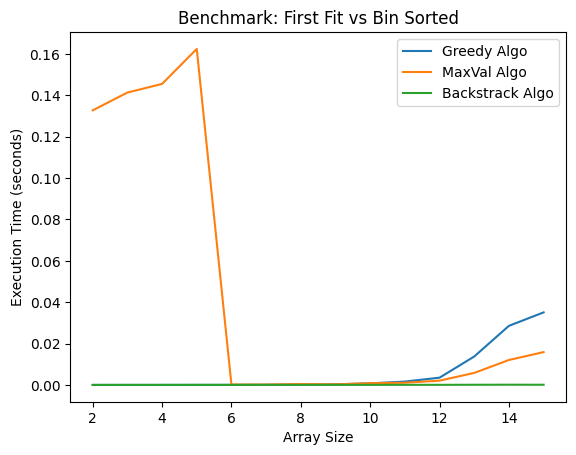

In [187]:
import matplotlib.pyplot as plt

# Plot the results
plt.plot(sizes, greedy_algo_times, label='Greedy Algo')
plt.plot(sizes, maxVal_times, label='MaxVal Algo')
plt.plot(sizes, backstrack_algo_times, label='Backstrack Algo')
plt.xlabel('Array Size')
plt.ylabel('Execution Time (seconds)')
plt.legend()
plt.title('Benchmark: First Fit vs Bin Sorted')
plt.show()

In [143]:
import time
import matplotlib.pyplot as plt

sizes = []
greedy_algo_results = []
maxVal_results = []
backstrack_algo_results = []
for _ in range(2,100):
    # Example usage:
    num_elements = _+10
    max_subset_size = _+20

    universe, subsets = generate_random_set(num_elements, max_subset_size)

    start_time = time.time()
    result1 = set_cover_greedy(universe, subsets)
    greedy_set_time = time.time() - start_time

    start_time = time.time()
    result2 = findUniverseSet(universe, subsets)
    maxVal_time = time.time() - start_time

    start_time = time.time()
    result3 = backtrack_set_cover(universe, subsets)
    backstrack_algo_time = time.time() - start_time



    print(len(result),len(result2),len(result3))

    sizes.append(_)
    greedy_algo_results.append(len(result1))
    maxVal_results.append(len(result2))
    backstrack_algo_results.append(len(result3))

3 5 4


KeyboardInterrupt: 

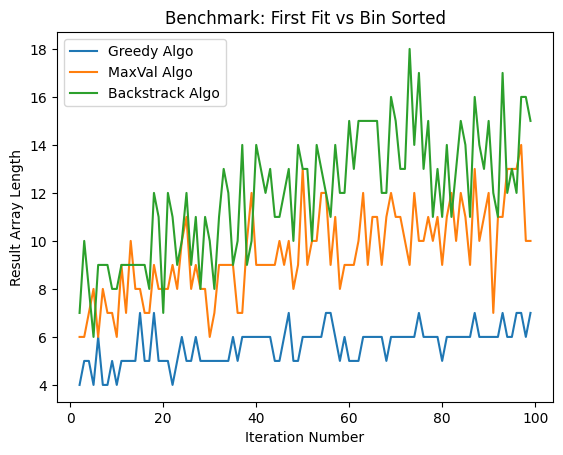

In [124]:
import matplotlib.pyplot as plt

# Plot the results
plt.plot(sizes, greedy_algo_results, label='Greedy Algo')
plt.plot(sizes, maxVal_results, label='MaxVal Algo')
plt.plot(sizes, backstrack_algo_results, label='Backstrack Algo')
plt.xlabel('Iteration Number')
plt.ylabel('Result Array Length')
plt.legend()
plt.title('Benchmark: First Fit vs Bin Sorted')
plt.show()

In [55]:
import time
import matplotlib.pyplot as plt

sizes = []
greedy_algo_times = []
maxVal_times = []
backstrack_algo_times = []
for _ in range(2,1000):
    # Example usage:
    num_elements = _+10
    max_subset_size = _+5
    print(_)

    universe, subsets = generate_random_set(num_elements, max_subset_size)


    start_time = time.time()
    result2 = findUniverseSet(universe, subsets)
    maxVal_time = time.time() - start_time

    start_time = time.time()
    result3 = backtrack_set_cover(universe, subsets)
    backstrack_algo_time = time.time() - start_time


    sizes.append(_)
    maxVal_times.append(maxVal_time)
    backstrack_algo_times.append(backstrack_algo_time)

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271


KeyboardInterrupt: 

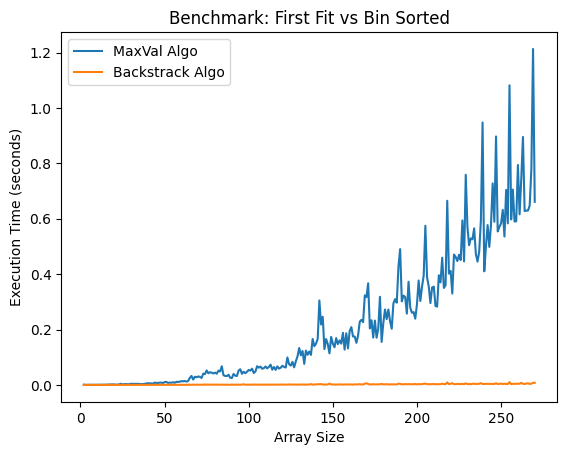

In [56]:
import matplotlib.pyplot as plt

# Plot the results
plt.plot(sizes, maxVal_times, label='MaxVal Algo')
plt.plot(sizes, backstrack_algo_times, label='Backstrack Algo')
plt.xlabel('Array Size')
plt.ylabel('Execution Time (seconds)')
plt.legend()
plt.title('Benchmark: First Fit vs Bin Sorted')
plt.show()

In [179]:
import random

def generate_set_cover_instance(universe_size, subset_count, max_subset_size):
    universe = set(range(1, universe_size + 1))
    subsets = []

    for _ in range(subset_count):
        if len(universe) <= 1:
            break  # Break out of the loop if the universe has insufficient elements
        subset_size = min(random.randint(1, min(max_subset_size, len(universe))), len(universe))
        subset = random.sample(universe, subset_size)
        subsets.append(set(subset))
        universe -= set(subset)

    return universe, subsets

# Example usage:
for _ in range(5):
    universe_size = 100
    subset_count = 8
    max_subset_size = 5

    universe, subsets = generate_set_cover_instance(universe_size, subset_count, max_subset_size)

    print("Universe:", universe)
    print("Subsets:", subsets)
    print()


Universe: {1, 2, 3, 4, 5, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41, 42, 44, 46, 47, 48, 49, 51, 53, 54, 55, 57, 58, 59, 60, 61, 62, 64, 65, 66, 68, 69, 70, 71, 73, 75, 77, 79, 80, 81, 82, 83, 84, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 97, 98, 99, 100}
Subsets: [{74, 28}, {8, 76, 29, 78}, {45}, {96, 72, 6}, {63}, {50, 43}, {52}, {56, 67, 36, 85}]

Universe: {2, 3, 4, 5, 6, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 32, 33, 34, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50, 51, 52, 54, 55, 56, 57, 58, 60, 61, 63, 64, 65, 66, 67, 68, 69, 70, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 84, 85, 86, 88, 89, 91, 93, 94, 95, 97, 98, 99, 100}
Subsets: [{59, 90, 83, 71}, {37, 7}, {62}, {96, 8}, {49, 82, 36, 87}, {35}, {1, 28, 53, 14}, {92, 31}]

Universe: {3, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 23, 24, 25, 26, 28, 29, 30, 32, 33, 34, 37, 39, 41, 42, 43, 44, 45, 46, 48

<ipython-input-179-2715a8b57eef>:11: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  subset = random.sample(universe, subset_size)


In [195]:
import time
import matplotlib.pyplot as plt

sizes = []
greedy_algo_times = []
maxVal_times = []
backstrack_algo_times = []
for _ in range(2,1000):
    # Example usage:
    universe_size = 100
    subset_count = int(random.uniform(0,100))
    max_subset_size = 10

    print(_)

    universe, subsets = generate_set_cover_instance(universe_size, subset_count, max_subset_size)

    start_time = time.time()
    result1 = set_cover_greedy(universe, subsets)
    greedy_set_time = time.time() - start_time


    start_time = time.time()
    result2 = findUniverseSet(list(universe), subsets)
    maxVal_time = time.time() - start_time



    start_time = time.time()
    result3 = backtrack_set_cover(universe, subsets)
    backstrack_algo_time = time.time() - start_time


    result_np = [item for sublist in result1 for item in sublist]
    result2_np = [item for sublist in result2 for item in sublist]
    result3_np = [item for sublist in result3 for item in sublist]
    print(sum(np.equal(np.unique(result_np),universe)) / len(universe))
    result2_np_unique = np.unique(result2_np)
    fraction = np.sum(np.isin(result2_np_unique, universe)) / len(universe)
    print(fraction)
    print(sum(np.equal(np.unique(result3_np),universe)) / len(universe))



    print(len(result),len(result2),len(result3))

    sizes.append(_)
    greedy_algo_times.append(greedy_set_time)
    maxVal_times.append(maxVal_time)
    backstrack_algo_times.append(backstrack_algo_time)

2


<ipython-input-179-2715a8b57eef>:11: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  subset = random.sample(universe, subset_size)


ZeroDivisionError: integer division or modulo by zero